# Data visualization with pyplot and seaborn

**References**:
+ https://matplotlib.org/stable/tutorials/pyplot.html

**Content**:
+ Matplotlib
    + figures in pyplot
    + create a new figure
    + indexing of subplots
    + adjust properties of axes
    + Working with data
+ Seaborn
    + Visualizing relational data
        + Axes-level functions & plt.subplots
        + axes-level vs. figure-level functions
        + adjusting figure size
    + Visualizing distributions
        + Using joint plot & pair plot
    + Visualizing categorical data

## Matplotlib

+ [API](https://matplotlib.org/stable/api/index.html)
+ we make use in particular of the module `pyplot` from `matplotlib` which is abbreviated by convention with `plt` when importing the module
    + import module: `import matplotlib.pyplot as plt`  
+ Matplotlib graphs your data on `Figures` which can contain
    + one or more axes, and
    + an area where data points can be specified in terms of x-y coordinates.

### Parts of a Figure
<img src="https://matplotlib.org/stable/_images/anatomy.png" width="400"/>

**Axes**
+ Artist attached to a Figure
+ contains a region for plotting data, and usually includes 2 or 3 Axis objects that provide ticks and tick labels to provide scales for the data
+ Each Axes also has
  + a title (`set_title()`),
    + an x- and y-label (`set_xlabel()`, `set_ylabel()`)

**Artist**
+ everything visible on the Figure is an Artist
+ includes Text objects, Line2D objects, collections objects, Patch objects, etc.

### Create a new figure
+ single figure:
    + `fig = plt.figure()`
    + returns a figure without subplots 
+ figure with subplots:
    + `fig, axs = plt.subplots(nrow, ncol)`
    + returns a tuple consisting of a figure and a set of axes
+ figure with subfigures that consists of subplots: 
```
fig = plt.figure()
subfigs = fig.subfigures(nrow, ncol)
subfigure0 = subfigs[0].subplots(nrow, ncol)
```

In [1]:
# import module


In [1]:
# create an empty figure

# create a figure with a two subplots arranged in 1 row and 2 columns

# create a figure with two subfigures that consists of subplots


### Indexing of subplots
+ numbering of subplots: the order is always `(row, col)` and we start indexing with **zero**
    + thus, in a 2x2 plot
        + the upper left plot is `axs[0,0]` (first row, first col)
        + the lower left plot is `axs[1,0]` (second row, first col)
        + etc.
    + **Note**, when we have only one row or one column, we use only scalars for indexing
        + e.g. in a 2x1 plot (two rows, one column), we call the upper subplot by `axs[0]` and the lower one by `axs[1]`  

In [2]:
# an example figure with subplots

# numbering in a 2x3 figure 

# set titles per subplot

# print only figure without further information

# numbering in a 1x3 figure

# set titles per subplot


### Adjust properties of the axes
+ when we address the axes of a subplot the methods name usually starts with `set_`
+ in the following some examples:
    + `set_title`: add **title** to your plot
    + `set_xlabel`: add **label** for your **x-axis**
    + `set_ylabel`: add **label** for your **y-axis**
    + `set_xlim`: set the **limits** of your **x-axis**
    + `set_ylim`: set the **limits** of your **y-axis**
    + `set_xticks`: provide list of ticks that you want to show on your x-axis (same for yticks)
    + `set_xticklabels`: provide list of labels that your ticks should have on your x-axis (same for yticklabels)
    + `set_axis_off`: remove a subplot from the grid
+ but we can also add some text or arrows:
    + `text`: incorporate some text in your figure
    + annotated arrow:
```
annotate('text', xy=(0.5, 0.5), xytext=(0.1, 0.8),
         arrowprops=dict(facecolor='black', shrink=0.1))
```

In [3]:
# an example 2x3 figure with subplots
# create 2x3 figure 

# set label for x and y axis

# remove last plot in first row

# set limits of y-axis for 2nd plot in 1st row

# modify ticks on the x-axis (1st plot 2nd row)

# add new labels to modified x-ticks

# create text 

# draw an annotated arrow


### Working with data 

+ the `plot` function takes x and y lists or arrays
+ when you provide a single list/array, pyplot assumes it is a sequence of y values, and automatically generates the x values for you
+ you can make a lot of modifications to your plot ([see API for more info](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_marker)) for example :
    + `linestyle = {'--',':','',}` : dashed, dotted, no-line
    + `linewidth = float`
    + `marker = '.', 'o', '2', 'v', ...` : point, circle, tri_up, triangle_down, etc. [see here for more info](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)
    + `markersize = float`
    + `color = {'r', 'red', Hex, RGB, ...}`: [see here for info about specifying colors](https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def)
+ it is also possible to have multiple data points in one plot (e.g., when you have a grouping variable
    + you can specify the different data sequentially in one `plot` or you use a `for`-loop 

In [4]:
# import numpy

# create some data for plotting


# create a 2x2 figure

# provide x and y data 

# a single data array will be interpreted as y-values, x-values will be autom. generated as a range of same length

# change marker type, color, linestyle

# short notation including color (first letter) and marker type (second letter)


In [5]:
# create some data for plotting

# multiple data in one plot

# alternative 


**Plotting with dictionnaries**
+ sofar we used lists or arrays for plotting, now we use dictionnaries

**Plotting categorical data**
+ to plot categorical data, we can also use histograms, barplots, boxplots, etc. (`plt.hist`, `plt.barplot`, `plt.boxplot`, etc.)

In [6]:
# generate data
# we have 3 groups (a,b,c) with 10 observations each. 
# We assume y is a linear function of x: b*x. Every group has a different 'b'

# create a new dictionary with one entry

# add further entries to the dict 

# plot data


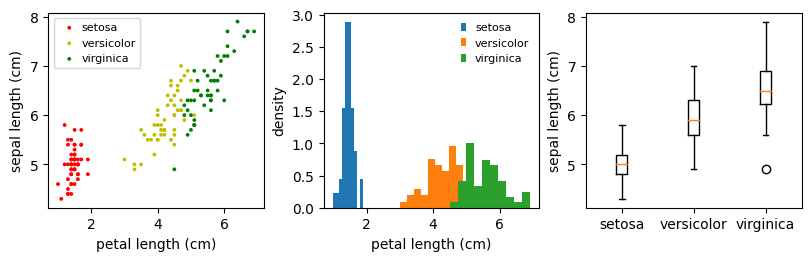

In [132]:
# another (more elaborate) example
import numpy as np
import pandas as pd
from sklearn import datasets

# load data set
d = datasets.load_iris()
# print(d)
# format dataset as DataFrame with feature names as column names
dat = pd.DataFrame(d["data"], columns = d["feature_names"])
# add info about species as column to dataframe
dat["species"] = d["target"]
# relabel values from 0,1,2 to 'setosa', 'versicolor', 'virginica'
dat["species"] = dat["species"].replace([0,1,2],d["target_names"])
# create color names for each species 
dat["species_col"] = dat["species"].replace(d["target_names"],["r","y","g"])
# show first lines of data
dat.head()

fig, ax = plt.subplots(1,3, constrained_layout = True, figsize = (8,2.5))
# create scatter plot
for loc, spec in enumerate(d["target_names"]):
    dat_filtered = dat[dat["species"] == spec]
    ax[0].scatter(x = dat_filtered["petal length (cm)"], 
                   y = dat_filtered["sepal length (cm)"],  # data
                   s = 3,                                  # size of scatter points
                   c = dat_filtered["species_col"],        # color data according to a grouping variable 
                   label = spec)                           # label data accordingly
    # create histogram
    ax[1].hist(dat_filtered["petal length (cm)"], bins = 10, label = spec, density = True)
    # create boxplot
    ax[2].boxplot(dat_filtered["sepal length (cm)"], positions = [loc])

# adjust axes and legend for scatterplot 
ax[0].legend(fontsize = 8,                 # size of label text
            markerscale = 1,               # size of handle 
            handletextpad = 0.1)           # distance between label text and handle
ax[0].set_xlabel("petal length (cm)")      # set labels of x and y-axis
ax[0].set_ylabel("sepal length (cm)")

# adjust axes and legend for scatterplot 
ax[1].legend(fontsize = 8, markerscale = 0.5, frameon=False, handlelength=0.5)
ax[1].set_xlabel("petal length (cm)")
ax[1].set_ylabel("density")

# adjust axes and legend for boxplot 
ax[2].set_xticklabels(labels = d["target_names"])
ax[2].set_ylabel("sepal length (cm)")
plt.show()

## Seaborn
+ you can find the [API here](https://seaborn.pydata.org/api.html)
+ by convention seaborn is imported via: `import seaborn as sns`
+ seaborn is a library for making statistical graphics in Python which builds on top of matplotlib
+ the code in seaborn is **hierarchically structured**. We can differentiate between
   + **modules** that achieve similar visualization goals (distributions, relations, categorical)
   + **functions** within a module that share a lot of underlying code and offer module specific features
       + **axes-level functions** plot data onto a single `matplotlib.pyplot.Axes` object, which is the return value of the function.
       + **figure-level functions** interface with matplotlib through a seaborn object, usually a `FacetGrid`, that manages the figure
+ Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions:

<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png" width="500"/>

### Visualizing relational data
+ module: **relational**
+ single figure-level function: `relplot`
+ multiple axes-level functions:
    + `scatterplot`
    + `lineplot` 

In [7]:
# import seaborn and pyplot

# load and inspect first rows of example dataset


In [8]:
# figure-level function with scatterplot on the axes-level

# figure-level function with lineplot on the axes-level
# By default, the resulting plot shows the mean and 95% CI for each unit


### Axes-level functions & plt.subplots
+ you can also call the axes-level functions directly and include them for example in `plt.subplots`
+ this gives you greate flexibility of creating your plot as you want it to have
+ each axes-level function has a `ax` argument which you can use the specify on which axes (i.e., subplot) the plot should appear

In [9]:
# using axes-level functions in plt.subplots

# left plot: scatterplot tip vs. total-bill grouped by gender

# right plot: lineplot tip vs. size


### Differences between axes-level and figure-level functions 
+ figure-level plots look mostly like their axes-level counterparts, except of:
    + legend (placed outside the plot for figure-level plots)
    + subplots (figure-level functions can create figures with multiple subplots)
    + combining different kinds of plots (better with axes-level functions)
+ figure-level functions
   + cannot (easily) be composed with other plots
   + return a FacetGrid instance, which has a few methods for customizing attributes of the plot 

In [10]:
# create two subplots for female and male


In [11]:
# load example data set

# create a relational plot (figure-level function)
# and save it as a new object (default type is scatterplot)

# use the new object to access the matplotlib axes 
# draw a diagonal line

# modify x- and y-label


### Specifying the figure size

+ axes-level function
    + `figsize()`
    + `set_size_inches()`
+ figure-level function:
    + have own parameters to control the size
    + parameters correspond to the size of each subplot, rather than the size of the overall figure

In [12]:
# subplots

# figure

# figure-level function: 


### Visualizing distributions

+ often we want to investigate the distribution of variables in our data set
+ module: **distributional**
+ figure-level function: `displot()`, `jointplot()`, `pairplot()`
+ axes-level functions:
    + `histplot()`
    + `kdeplot()`
    + `ecdfplot()`
    + `rugplot()`

In [13]:
# overview of the different axes-level functions using the penguin data


In [14]:
# example for figure-level displot
# default is histogram (kind='hist')
 
# change axes-level function through `kind`

# add second variable (try: kind="kde")
 
# add third variable


#### Using `jointplot` and `pairplot`
+ `jointplot` and `pairplot` employ multiple kinds of plots from different modules to represent multiple aspects of a dataset in a single figure
+ Both are figure-level functions and create figures with multiple subplots by default.
+ But they use different objects to manage the figure: `JointGrid` and `PairGrid`, respectively.

**`jointplot`**: plots the relationship or joint distribution of two variables while adding marginal axes that show the univariate distribution of each one separately

**`pairplot`**: combines joint and marginal views; rather than focusing on a single relationship, it visualizes every pairwise combination of variables simultaneously

In [15]:
# load an example data set

# joint plot

# pairplot


### Visualizing categorical data
+ module: **categorical**
+ figure-level function: `catplot()`
+ axes-level functions:
    + Categorical scatterplots:
        + stripplot() (with kind="strip"; the default)
        + swarmplot() (with kind="swarm")
    + Categorical distribution plots:
        + boxplot() (with kind="box")
        + violinplot() (with kind="violin")
        + boxenplot() (with kind="boxen")
    + Categorical estimate plots:
        + pointplot() (with kind="point")
        + barplot() (with kind="bar")
        + countplot() (with kind="count")

In [16]:
# load and inspect first rows of example dataset 'tips'


In [17]:
# categorical scatterplot (note: size argument)


In [18]:
# categorical distributions 


In [19]:
# categorical estimate plot 
